In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import numpy as np


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv",encoding='latin1')

In [4]:
train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km?),Density (P/Km?)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [5]:
test.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [6]:
print("train dataset shape",train.shape)

print("test dataset shape",test.shape)

train dataset shape (27481, 10)
test dataset shape (4815, 9)


In [7]:
print("train dataset info\n",train.info())

print("test dataset info",test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km?)   27481 non-null  float64
 9   Density (P/Km?)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB
train dataset info
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   o

In [8]:
print("--TRAIN NULL VALUES--\n")
print(train.isnull().sum())

print("--TEST NULL VALUES--\n")
print(test.isnull().sum())

--TRAIN NULL VALUES--

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km?)     0
Density (P/Km?)     0
dtype: int64
--TEST NULL VALUES--

textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64


In [9]:
test[test.isnull()]

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
test = test.dropna()
test

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554.0,120340.0,55.0
3530,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644.0,1266700.0,19.0
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589.0,910770.0,226.0
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816.0,120410.0,214.0


In [11]:
train[train["text"].isnull()]

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km?),Density (P/Km?)
314,fdb77c3752,NaN,NaN,neutral,night,31-45,Namibia,2540905,823000.0,3


In [12]:
train[train["text"].isnull()] = train[train["text"].isnull()].fillna("not available")

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27481 non-null  object 
 2   selected_text     27481 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km?)   27481 non-null  float64
 9   Density (P/Km?)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


# Sentiment Visualization

In [14]:
sent_value_count = train["sentiment"].value_counts()
sent_value_count

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

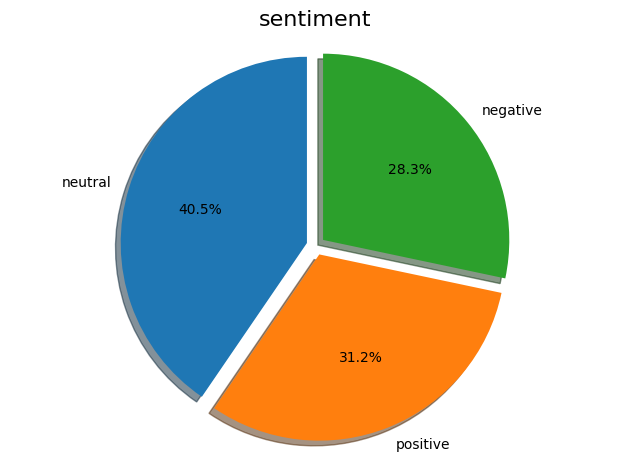

In [15]:
plt.pie(sent_value_count, labels = sent_value_count.index,autopct = '%.1f%%',
         startangle = 90, shadow= True, explode =[0.05] * len(sent_value_count))
plt.title("sentiment", fontsize = 16)
plt .axis("equal")
plt.tight_layout()
plt.show()

C:\Users\abc\AppData\Local\Temp\ipykernel_1020\1946062304.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=train, palette='Set2')


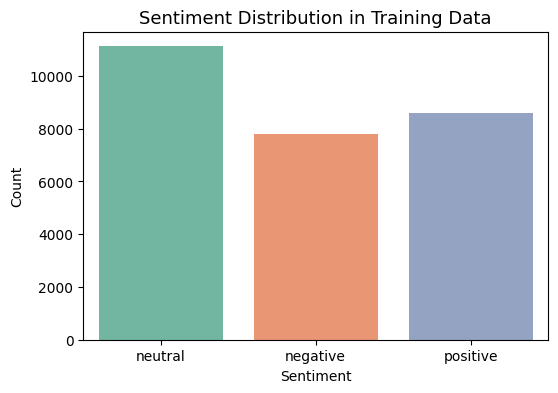

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=train, palette='Set2')
plt.title("Sentiment Distribution in Training Data", fontsize=13)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [17]:
#FOR CLEANING COLUMN
import re

def column_cleaning(clean):
    clean = clean.lower()
    clean = clean.strip()
    clean = re.sub(r'[^\w\s]', '',clean)
    clean = clean.replace(" ","_")
    clean = clean.replace("-","")
    

    return clean


In [18]:
clean_columns = pd.Series(train.columns).apply(column_cleaning)

In [19]:
clean_columns

0             textid
1               text
2      selected_text
3          sentiment
4      time_of_tweet
5        age_of_user
6            country
7    population_2020
8       land_area_km
9        density_pkm
dtype: object

# DATA CLEANING

In [20]:
import re

def clean_data(data):
    data = data.strip()
    data = re.sub(r'[^\w\s]', '',data)
    data = data.lower()
    data = re.sub(r'(http\S+|www\.\S+|@\w+|#\w+)', '', data)
    data = data.replace("http","").strip()
    

    return data

In [21]:
if 'text' in train.columns:
    train['clean_text'] = train['text'].apply(clean_data)
    test['clean_text'] = test['text'].apply(clean_data)
else:
    print("No text column found in dataset!")

print("\nBefore and After Text Cleaning:\n")
for i in range(3):
    print(f"Original: {train['text'].iloc[i]}")
    print(f"Cleaned : {train['clean_text'].iloc[i]}")
    print("-" * 60)


Before and After Text Cleaning:

Original:  I`d have responded, if I were going
Cleaned : id have responded if i were going
------------------------------------------------------------
Original:  Sooo SAD I will miss you here in San Diego!!!
Cleaned : sooo sad i will miss you here in san diego
------------------------------------------------------------
Original: my boss is bullying me...
Cleaned : my boss is bullying me
------------------------------------------------------------


In [22]:
if 'text' in train.columns:
    train['clean_selected_text'] = train['selected_text'].apply(clean_data)
    test['clean_selected_text'] = test['text'].apply(clean_data)
else:
    print("No text column found in dataset!")

print("\nBefore and After Text Cleaning:\n")
for i in range(3):
    print(f"Original: {train['selected_text'].iloc[i]}")
    print(f"Cleaned : {train['clean_selected_text'].iloc[i]}")
    print("-" * 60)


Before and After Text Cleaning:

Original: I`d have responded, if I were going
Cleaned : id have responded if i were going
------------------------------------------------------------
Original: Sooo SAD
Cleaned : sooo sad
------------------------------------------------------------
Original: bullying me
Cleaned : bullying me
------------------------------------------------------------


In [23]:
X = train["text"]
y = train["sentiment"]


# SPLIT DATA INTO 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Data split done!")

Data split done!


# TF-IDF VECTORIZER

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

results = []

#TF-IDF VECTORIZER
for max_feat in [1000, 5000, 10000]:
    for ngram in [(1,1),(1,2),(1,3)]:


        vectorizer = TfidfVectorizer(
            max_features=max_feat,
            ngram_range=ngram,
            min_df=2,
            max_df=0.9,
            stop_words="english"
        )
   
        X_train_tfidf = vectorizer.fit_transform(X_train)
        X_test_tfidf = vectorizer.transform(X_test)

        for model_name, model in models.items():
            model.fit(X_train_tfidf, y_train)
            preds = model.predict(X_test_tfidf)

            acc = accuracy_score(y_test, preds)
            cr = classification_report(
            y_test,
            preds,
            output_dict=True
            )
            precision = precision_score(y_test, preds, average="weighted")
            recall    = recall_score(y_test, preds, average="weighted")
            f1        = f1_score(y_test, preds, average="weighted")

            
            results.append({
                "Vectorizer": "TF-IDF",
                "Model": model_name,
                "max_features": max_feat,
                "ngram": str(ngram),
                "accuracy": acc,
                "Precision": precision,
                "Recall": recall,
                "F1_score": f1
            })

            print(f"{model_name}: {acc:.4f}")



Logistic Regression: 0.6884
Naive Bayes: 0.6420
Linear SVM: 0.6871
Random Forest: 0.6949
Decision Tree: 0.5472
K-Nearest Neighbors: 0.5330
Logistic Regression: 0.6842
Naive Bayes: 0.6362
Linear SVM: 0.6831
Random Forest: 0.6884
Decision Tree: 0.5492
K-Nearest Neighbors: 0.5267
Logistic Regression: 0.6822
Naive Bayes: 0.6351
Linear SVM: 0.6835
Random Forest: 0.6880
Decision Tree: 0.5487
K-Nearest Neighbors: 0.5274
Logistic Regression: 0.6887
Naive Bayes: 0.6362
Linear SVM: 0.6738
Random Forest: 0.7064
Decision Tree: 0.5499
K-Nearest Neighbors: 0.4724
Logistic Regression: 0.6876
Naive Bayes: 0.6402
Linear SVM: 0.6713
Random Forest: 0.7038
Decision Tree: 0.5499
K-Nearest Neighbors: 0.4879
Logistic Regression: 0.6884
Naive Bayes: 0.6389
Linear SVM: 0.6676
Random Forest: 0.7069
Decision Tree: 0.5496
K-Nearest Neighbors: 0.4864
Logistic Regression: 0.6849
Naive Bayes: 0.6329
Linear SVM: 0.6658
Random Forest: 0.7097
Decision Tree: 0.5507
K-Nearest Neighbors: 0.4759
Logistic Regression: 0.6882

In [25]:
result_df = pd.DataFrame(results)
result_df

,Vectorizer,Model,max_features,ngram,accuracy,Precision,Recall,F1_score
0,TF-IDF,Logistic Regression,1000,"(1, 1)",0.688375,0.700868,0.688375,0.687896
1,TF-IDF,Naive Bayes,1000,"(1, 1)",0.641987,0.675249,0.641987,0.638671
2,TF-IDF,Linear SVM,1000,"(1, 1)",0.687102,0.695492,0.687102,0.686714
3,TF-IDF,Random Forest,1000,"(1, 1)",0.694925,0.699337,0.694925,0.694253
4,TF-IDF,Decision Tree,1000,"(1, 1)",0.547208,0.664418,0.547208,0.497719
5,TF-IDF,K-Nearest Neighbors,1000,"(1, 1)",0.533018,0.573770,0.533018,0.519864
6,TF-IDF,Logistic Regression,1000,"(1, 2)",0.684191,0.697206,0.684191,0.683764
7,TF-IDF,Naive Bayes,1000,"(1, 2)",0.636165,0.672718,0.636165,0.632576
8,TF-IDF,Linear SVM,1000,"(1, 2)",0.683100,0.691245,0.683100,0.682773
9,TF-IDF,Random Forest,1000,"(1, 2)",0.688375,0.692243,0.688375,0.687322


# COUNT VECTORIZER

In [26]:
count_results = []


models_count = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}
#TF-IDF VECTORIZER
for max_feat in [1000, 5000, 10000]:
    for ngram in [(1,1),(1,2),(1,3)]:


        vectorizer_c = CountVectorizer(
            max_features=max_feat,
            ngram_range=ngram,
            min_df=2,
            max_df=0.9,
            stop_words="english"
        )


        X_train_count = vectorizer_c.fit_transform(X_train)
        X_test_count = vectorizer_c.transform(X_test)

        for model_name, model in models_count.items():
            model.fit(X_train_count, y_train)
            preds_count = model.predict(X_test_count)
    
            acc_c = accuracy_score(y_test,  preds_count)
            cr_c = classification_report(
            y_test,
            preds_count,
            output_dict=True
            )
            precision = precision_score(y_test, preds_count, average="weighted")
            recall    = recall_score(y_test, preds_count, average="weighted")
            f1        = f1_score(y_test, preds_count, average="weighted")

            
    
            count_results.append({
                 "Vectorizer": "Count",
                 "Model": model_name,
                 "max_features": max_feat,
                 "ngram": str(ngram),
                 "accuracy": acc_c,
                 "Precision": precision,
                 "Recall": recall,
                 "F1_score": f1
                })

            print(f"{model_name}: {acc_c:.4f}")


Logistic Regression: 0.6947
Naive Bayes: 0.6553
Linear SVM: 0.6922
Random Forest: 0.6831
Decision Tree: 0.5519
K-Nearest Neighbors: 0.5450
Logistic Regression: 0.6889
Naive Bayes: 0.6449
Linear SVM: 0.6846
Random Forest: 0.6833
Decision Tree: 0.5516
K-Nearest Neighbors: 0.5618
Logistic Regression: 0.6871
Naive Bayes: 0.6413
Linear SVM: 0.6851
Random Forest: 0.6747
Decision Tree: 0.5514
K-Nearest Neighbors: 0.5619
Logistic Regression: 0.6873
Naive Bayes: 0.6496
Linear SVM: 0.6685
Random Forest: 0.6942
Decision Tree: 0.5518
K-Nearest Neighbors: 0.5623
Logistic Regression: 0.6864
Naive Bayes: 0.6525
Linear SVM: 0.6678
Random Forest: 0.6866
Decision Tree: 0.5518
K-Nearest Neighbors: 0.5607
Logistic Regression: 0.6853
Naive Bayes: 0.6493
Linear SVM: 0.6644
Random Forest: 0.6913
Decision Tree: 0.5516
K-Nearest Neighbors: 0.5599
Logistic Regression: 0.6851
Naive Bayes: 0.6489
Linear SVM: 0.6595
Random Forest: 0.6909
Decision Tree: 0.5516
K-Nearest Neighbors: 0.5572
Logistic Regression: 0.6853

In [27]:
count_result_df = pd.DataFrame(count_results)
count_result_df

,Vectorizer,Model,max_features,ngram,accuracy,Precision,Recall,F1_score
0,Count,Logistic Regression,1000,"(1, 1)",0.694743,0.706583,0.694743,0.694083
1,Count,Naive Bayes,1000,"(1, 1)",0.655267,0.666720,0.655267,0.655371
2,Count,Linear SVM,1000,"(1, 1)",0.692196,0.701362,0.692196,0.691468
3,Count,Random Forest,1000,"(1, 1)",0.683100,0.683613,0.683100,0.682229
4,Count,Decision Tree,1000,"(1, 1)",0.551937,0.669328,0.551937,0.503112
5,Count,K-Nearest Neighbors,1000,"(1, 1)",0.545025,0.574395,0.545025,0.541719
6,Count,Logistic Regression,1000,"(1, 2)",0.688921,0.701401,0.688921,0.688359
7,Count,Naive Bayes,1000,"(1, 2)",0.644897,0.659124,0.644897,0.645133
8,Count,Linear SVM,1000,"(1, 2)",0.684555,0.694597,0.684555,0.683774
9,Count,Random Forest,1000,"(1, 2)",0.683282,0.683790,0.683282,0.682373


In [28]:
## count vs tfidf

compare_results_df = pd.concat([result_df,count_result_df], ignore_index=True)

mean_results = (
    compare_results_df
    .groupby(["Vectorizer", "Model"])
    .agg({
        "Precision": "mean",
        "Recall": "mean",
        "F1_score": "mean",
        "accuracy": "mean"
    })
    .reset_index()
    .sort_values(by="F1_score", ascending=False)
)

print(mean_results)
print("")

print("----BEST AVG MODEL-----\n")
best_avg_model = mean_results.iloc[0]
print(best_avg_model)

   Vectorizer                Model  Precision    Recall  F1_score  accuracy
11     TF-IDF        Random Forest   0.705984  0.701918  0.701189  0.701918
5       Count        Random Forest   0.688973  0.688598  0.687660  0.688598
3       Count  Logistic Regression   0.695864  0.687163  0.687264  0.687163
9      TF-IDF  Logistic Regression   0.699055  0.686900  0.686891  0.686900
8      TF-IDF           Linear SVM   0.680164  0.675277  0.675461  0.675277
2       Count           Linear SVM   0.675973  0.671134  0.671167  0.671134
4       Count          Naive Bayes   0.658008  0.648596  0.649268  0.648596
10     TF-IDF          Naive Bayes   0.670357  0.636711  0.633726  0.636711
1       Count  K-Nearest Neighbors   0.605453  0.558790  0.543558  0.558790
0       Count        Decision Tree   0.668494  0.551715  0.502894  0.551715
6      TF-IDF        Decision Tree   0.667049  0.549492  0.500028  0.549492
7      TF-IDF  K-Nearest Neighbors   0.560750  0.495078  0.458785  0.495078

----BEST AV

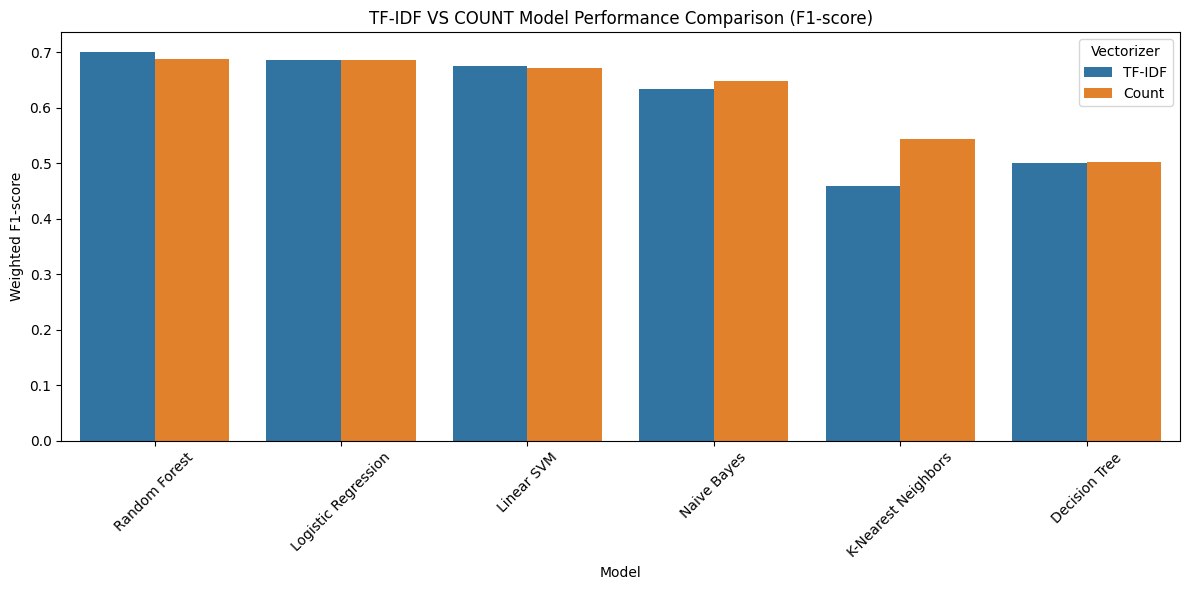

In [30]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=mean_results,
    x="Model",
    y="F1_score",
    hue="Vectorizer"
)

plt.title("TF-IDF VS COUNT Model Performance Comparison (F1-score)")
plt.ylabel("Weighted F1-score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(title="Vectorizer")
plt.tight_layout()
plt.show()


#"The bar chart compares the weighted F1-scores of different models using TF-IDF and Count Vectorization
#TF-IDF consistently outperforms Count Vectorization across all classifiers, 
#with Random Forest achieving the highest overall performance."

In [31]:
# ensemble vs indiviual model


best_run = result_df.loc[
    result_df["F1_score"].idxmax()
]
print("----BEST INDIVIUAL PERFORMING MODEL----\n")
best_run

----BEST INDIVIUAL PERFORMING MODEL----



Vectorizer             TF-IDF
Model           Random Forest
max_features            10000
ngram                  (1, 2)
accuracy             0.710569
Precision            0.714834
Recall               0.710569
F1_score             0.709977
Name: 45, dtype: object

In [32]:
best_configs = (
    result_df
    .sort_values("F1_score", ascending=False)
    .groupby(["Vectorizer", "Model"])
    .first()
    .reset_index()
)

best_configs

,Vectorizer,Model,max_features,ngram,accuracy,Precision,Recall,F1_score
0,TF-IDF,Decision Tree,10000,"(1, 1)",0.550664,0.667951,0.550664,0.501419
1,TF-IDF,K-Nearest Neighbors,1000,"(1, 1)",0.533018,0.573770,0.533018,0.519864
2,TF-IDF,Linear SVM,1000,"(1, 1)",0.687102,0.695492,0.687102,0.686714
3,TF-IDF,Logistic Regression,10000,"(1, 3)",0.689467,0.700833,0.689467,0.689594
4,TF-IDF,Naive Bayes,1000,"(1, 1)",0.641987,0.675249,0.641987,0.638671
5,TF-IDF,Random Forest,10000,"(1, 2)",0.710569,0.714834,0.710569,0.709977


In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [34]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}



Confusion Matrix: Decision Tree
Config : max_features=10000, ngram=(1, 1)


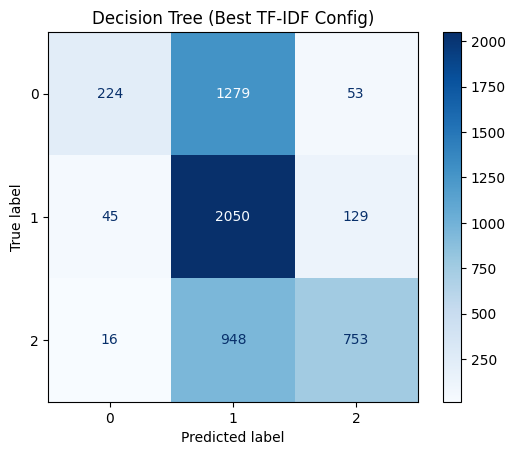


Confusion Matrix: K-Nearest Neighbors
Config : max_features=1000, ngram=(1, 1)


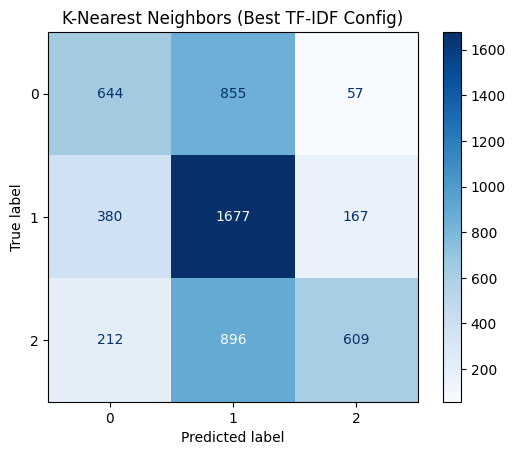


Confusion Matrix: Linear SVM
Config : max_features=1000, ngram=(1, 1)


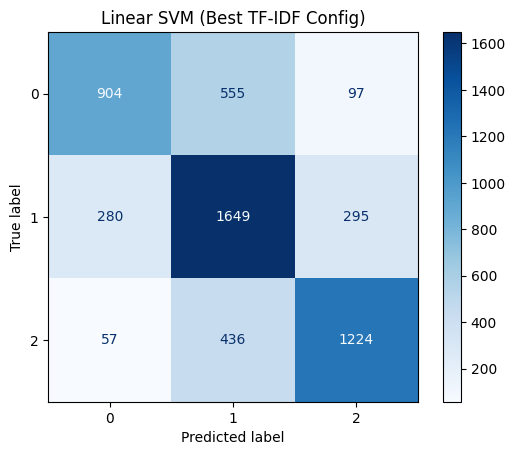


Confusion Matrix: Logistic Regression
Config : max_features=10000, ngram=(1, 3)


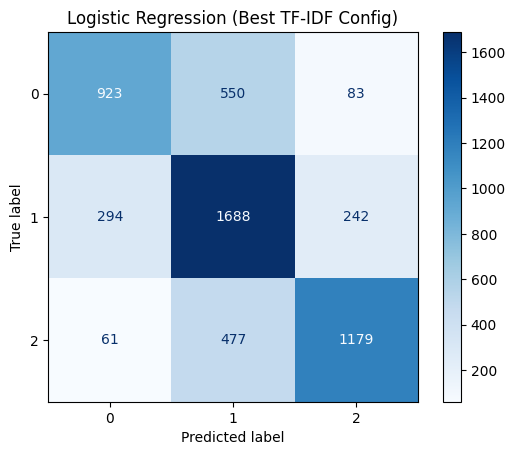


Confusion Matrix: Naive Bayes
Config : max_features=1000, ngram=(1, 1)


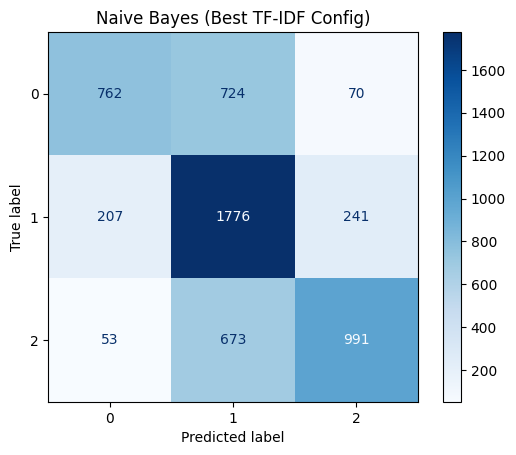


Confusion Matrix: Random Forest
Config : max_features=10000, ngram=(1, 2)


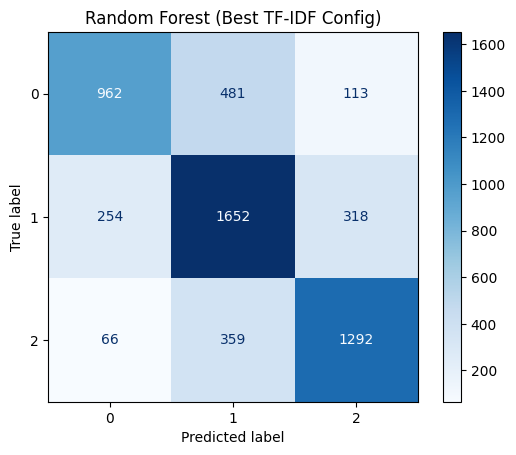

In [35]:
for _, row in best_configs.iterrows():

    model_name = row["Model"]
    max_feat = int(row["max_features"])
    ngram = eval(row["ngram"])  # convert string "(1,2)" → tuple

    print(f"\nConfusion Matrix: {model_name}")
    print(f"Config : max_features={max_feat}, ngram={ngram}")

    # Vectorizer (TF-IDF best config)
    vectorizer = TfidfVectorizer(
        max_features=max_feat,
        ngram_range=ngram,
        min_df=2,
        max_df=0.9,
        stop_words="english"
    )

    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec  = vectorizer.transform(X_test)

    # Train model
    model = models[model_name]
    model.fit(X_train_vec, y_train)

    preds = model.predict(X_test_vec)

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    disp.plot(cmap="Blues")
    plt.title(f"{model_name} (Best TF-IDF Config)")
    plt.show()


    
##Confusion matrices were generated for each classifier using the best-performing TF-IDF configuration.
##Ensemble-based Random Forest showed a better balance between false positives and false negatives,
##while linear models such as Logistic Regression and Linear SVM demonstrated stable classification behavior across sentiment classes.

C:\Users\abc\AppData\Local\Temp\ipykernel_1020\2682897719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="accuracy", data=best_configs, palette="coolwarm")


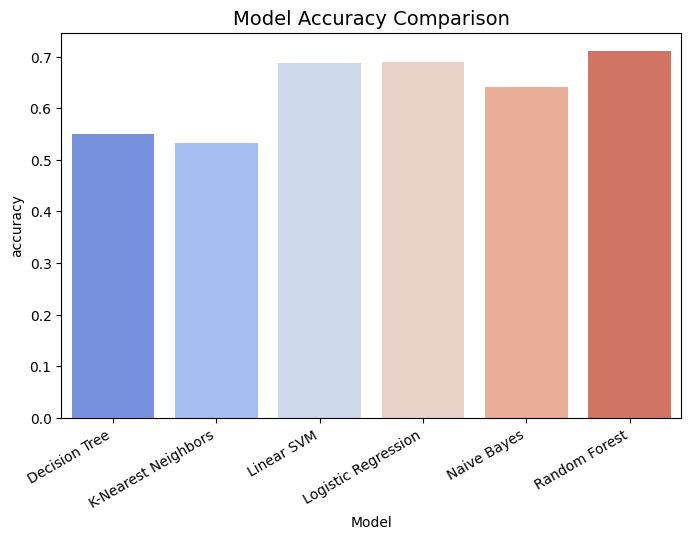

C:\Users\abc\AppData\Local\Temp\ipykernel_1020\2682897719.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1_score", data=best_configs, palette="mako")


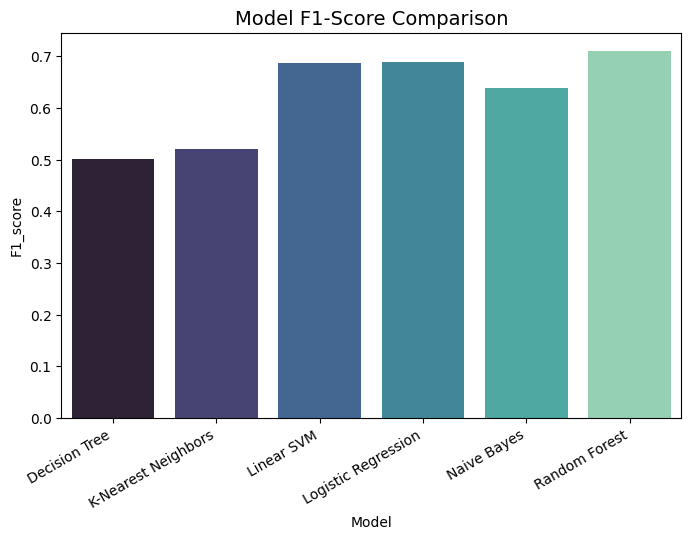


Best Performing Model: Vectorizer             TF-IDF
Model           Random Forest
max_features            10000
ngram                  (1, 2)
accuracy             0.710569
Precision            0.714834
Recall               0.710569
F1_score             0.709977
Name: 45, dtype: object


In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="accuracy", data=best_configs, palette="coolwarm")
plt.xticks(rotation=30, ha='right')
plt.title("Model Accuracy Comparison", fontsize=14)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="F1_score", data=best_configs, palette="mako")
plt.xticks(rotation=30, ha='right')
plt.title("Model F1-Score Comparison", fontsize=14)
plt.show()


print(f"\nBest Performing Model: {best_run}")

In [37]:
##This project presented a complete sentiment analysis pipeline, including preprocessing, feature engineering, model training,
##evaluation, and visualization. TF-IDF vectorization consistently improved model performance compared to Count Vectorization.
##Ensemble methods such as Random Forest achieved the best overall results. 
##Confusion matrices and performance comparison charts provided insight into model behavior and effectiveness, 
##while sentiment distribution plots highlighted class imbalance considerations.